In [ ]:
# 📁 Topic: Mounting Google Drive in Colab
# 📌 Description: This code connects your Google Drive to the Colab environment.
# 🎯 Use: Allows you to access and save files from/to Google Drive while running your notebook.

from google.colab import drive
drive.mount('/content/drive')

print("\n✅🔗 Google Drive successfully mounted to /content/drive — all your files are now accessible! 🚀📂\n")


Mounted at /content/drive

✅🔗 Google Drive successfully mounted to /content/drive — all your files are now accessible! 🚀📂



In [ ]:
# 📦 Topic: Importing Required Libraries
# 📌 Description: This block imports all necessary libraries for file handling, data analysis, visualization, and image processing.
# 🎯 Use: These libraries are essential for reading images, handling data, visualizing results, and working with file paths in the fire detection project.

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import numpy as np

print("\n✅📚 All essential libraries imported successfully — Environment is ready for action! ⚙️🧠\n")



✅📚 All essential libraries imported successfully — Environment is ready for action! ⚙️🧠



In [ ]:
# 📁 Topic: Dataset Summary - Image and Label Count
# 📌 Description: This block counts the number of image and label files in each dataset split (train, val, test).
# 🎯 Use: Helps verify if all data files are properly structured and available before training the fire detection model.

base_path = "/content/drive/MyDrive/fdy_datset/"  # 🔁 UPDATE POINT

def count_files(folder):
    image_count = len(glob.glob(f"{folder}/images/*.jpg"))
    label_count = len(glob.glob(f"{folder}/labels/*.txt"))
    return image_count, label_count

for split in ["train", "val", "test"]:
    img_cnt, lbl_cnt = count_files(base_path + split)
    print(f"{split.upper()}: {img_cnt} images, {lbl_cnt} labels")

print("\n📊✅ Dataset integrity check complete — Image & Label stats displayed for all splits! 🔥🗂️\n")


TRAIN: 3900 images, 3900 labels
VAL: 1310 images, 1300 labels
TEST: 1300 images, 1300 labels

📊✅ Dataset integrity check complete — Image & Label stats displayed for all splits! 🔥🗂️



In [ ]:
# 🚨 Topic: Checking for Missing Label Files
# 📌 Description: This block checks if each image file has a corresponding label file in the dataset.
# 🎯 Use: Ensures that every image has its annotation, which is crucial for training an object detection model properly.

def check_missing_labels(split):
    img_paths = glob.glob(f"{base_path}/{split}/images/*.jpg")
    miss_count = 0
    for img_path in img_paths:
        label_path = img_path.replace("/images/", "/labels/").replace(".jpg", ".txt")
        if not os.path.exists(label_path):
            print("❌ Missing label for:", img_path)
            miss_count += 1
    print(f"🔎 Total missing labels in {split.upper()}: {miss_count}\n")

for split in ["train", "val", "test"]:
    check_missing_labels(split)

print("\n✅📋 Label validation complete — All dataset splits have been checked for missing labels! 🔥\n")


🔎 Total missing labels in TRAIN: 0

❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1209 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1212 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1205 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1204 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1208 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_121 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1210 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1207 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1211 (1).jpg
❌ Missing label for: /content/drive/MyDrive/fdy_datset//val/images/val_1206 (1).jpg
🔎 Total missing labels in VAL: 10

🔎 Total missing labels in TEST: 0


✅📋 Label validation complete — All dataset splits have

In [ ]:
# 🏷️ Topic: Reading YOLO Label Files into DataFrame
# 📌 Description: This function reads YOLO-format label files from each dataset split and converts them into a structured DataFrame.
# 🎯 Use: Useful for analyzing and visualizing label distribution, coordinates, and class-wise data insights.

def read_labels(split):
    label_files = glob.glob(f"{base_path}/{split}/labels/*.txt")
    all_data = []
    for file in label_files:
        with open(file, 'r') as f:
            lines = f.readlines()
            for line in lines:
                cls, x_center, y_center, width, height = map(float, line.strip().split())
                all_data.append([split, file, int(cls), x_center, y_center, width, height])
    return pd.DataFrame(all_data, columns=["split", "file", "class", "x_center", "y_center", "width", "height"])

df_labels = pd.concat([read_labels(s) for s in ["train", "val", "test"]], ignore_index=True)
df_labels.head()

print("\n✅📄 Label data from all splits loaded into DataFrame — ready for analysis & visualization! 🧠📊\n")



✅📄 Label data from all splits loaded into DataFrame — ready for analysis & visualization! 🧠📊



In [ ]:
# 🧾 Topic: Extracting Unique Class IDs from Label Files
# 📌 Description: This block scans all label files across train, val, and test splits to collect unique class IDs used in the dataset.
# 🎯 Use: Helps verify how many and which classes are present, useful for checking label correctness and for visualizing class distributions.

from glob import glob

label_path = "/content/drive/MyDrive/fdy_datset"  # 🔁 UPDATE POINT
all_classes = set()

for split in ["train", "val", "test"]:
    label_files = glob(f"{label_path}/{split}/labels/*.txt")
    for file in label_files:
        with open(file, 'r') as f:
            for line in f:
                class_id = int(line.strip().split()[0])
                all_classes.add(class_id)

print("Classes found in dataset:", all_classes)
print(f"\n✅🧠 Unique class extraction complete — Found {len(all_classes)} unique class(es): {sorted(all_classes)} 🔍📊\n")


Classes found in dataset: {0, 1}

✅🧠 Unique class extraction complete — Found 2 unique class(es): [0, 1] 🔍📊



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


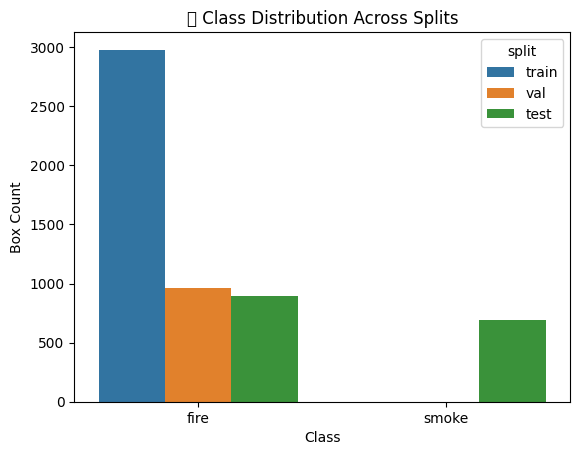


📊✅ Visualized class distribution across train/val/test splits — Check for balance between 'fire' and 'smoke' labels! 🔥🟠💨



In [ ]:
# 📊 Topic: Visualizing Class Distribution by Split
# 📌 Description: This block maps class IDs to readable names ('fire', 'smoke') and visualizes how many instances of each class exist across train, val, and test sets.
# 🎯 Use: Helps understand dataset balance and identify if any class is underrepresented — important for training performance.

import seaborn as sns
import matplotlib.pyplot as plt

# Mapping class IDs to names
class_names = {0: 'fire', 1: 'smoke'}
df_labels["class_name"] = df_labels["class"].map(class_names)

# Plotting class distribution
sns.countplot(x="class_name", hue="split", data=df_labels)
plt.title("Class Distribution Across Splits")
plt.xlabel("Class")
plt.ylabel("Box Count")
plt.show()

print("\n📊✅ Visualized class distribution across train/val/test splits — Check for balance between 'fire' and 'smoke' labels! 🔥🟠💨\n")


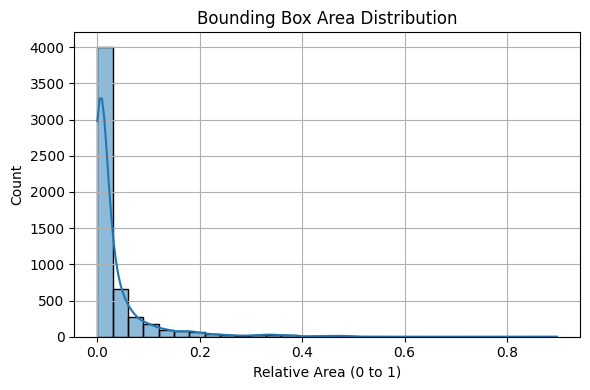


📦✅ Bounding box area distribution plotted — gives insights into object size variation across the dataset! 📏📊



In [ ]:
# 📦 Topic: Bounding Box Area Analysis
# 📌 Description: This block calculates the area of each bounding box in the dataset and plots a histogram of their distribution.
# 🎯 Use: Helps understand the relative size of labeled objects — useful to check for tiny or unusually large annotations that may affect model performance.

df_labels["bbox_area"] = df_labels["width"] * df_labels["height"]

plt.figure(figsize=(6, 4))
sns.histplot(df_labels["bbox_area"], bins=30, kde=True)
plt.title("Bounding Box Area Distribution")
plt.xlabel("Relative Area (0 to 1)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n📦✅ Bounding box area distribution plotted — gives insights into object size variation across the dataset! 📏📊\n")


/tmp/ipython-input-9-418541045.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


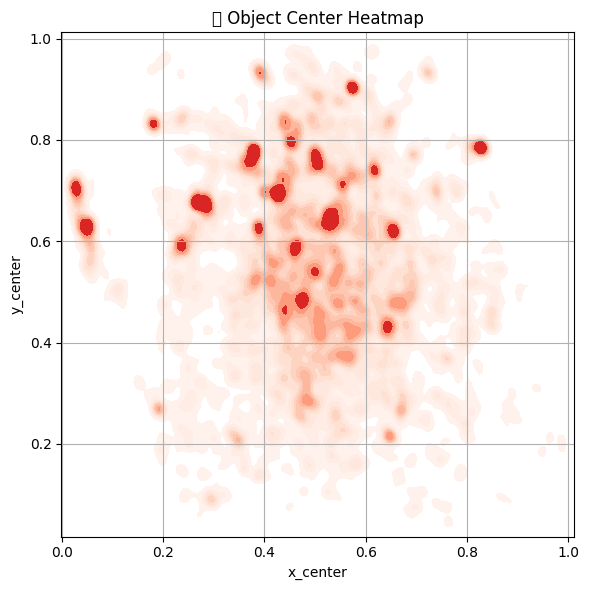


🎯✅ Object center heatmap generated — observe spatial label concentration in dataset! 📍📸



In [ ]:
# 🎯 Topic: Object Center Position Heatmap
# 📌 Description: This block plots a KDE heatmap showing the distribution of bounding box centers (x, y) across all images.
# 🎯 Use: Helps visualize where objects mostly appear in images — useful to detect center bias or uneven label placement.

plt.figure(figsize=(6, 6))
sns.kdeplot(
    x=df_labels["x_center"],
    y=df_labels["y_center"],
    cmap="Reds",
    fill=True,
    bw_adjust=0.2
)
plt.title("Object Center Heatmap")
plt.xlabel("x_center")
plt.ylabel("y_center")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n🎯✅ Object center heatmap generated — observe spatial label concentration in dataset! 📍📸\n")


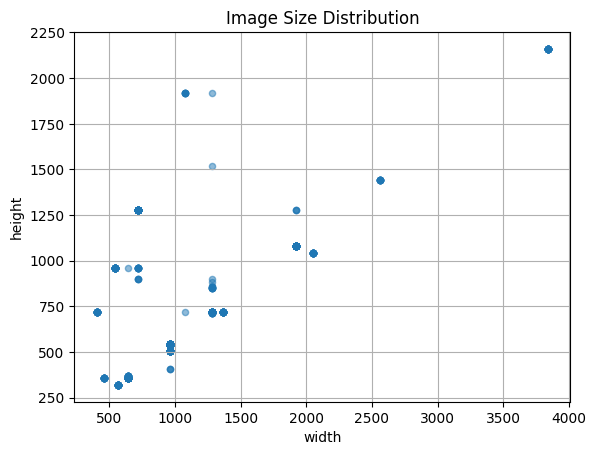


📐✅ Image dimension check complete — Scatter plot visualized to ensure consistent sizes! 🖼️🔍



In [ ]:
# 📐 Topic: Analyzing Image Dimensions in Dataset
# 📌 Description: This block checks the width and height of all training images to detect resolution inconsistencies.
# 🎯 Use: Ensures all input images are consistent or suitable for model training — helps spot corrupt or odd-sized files.

import glob
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# 📂 Base path to the dataset
base_path = "/content/drive/MyDrive/fdy_datset"  # 🔁 UPDATE POINT

# 🧰 Function to extract width and height of images
def get_image_shapes(split):
    img_shapes = []
    img_paths = glob.glob(f"{base_path}/{split}/images/*.jpg")
    for img_path in img_paths:
        try:
            img = cv2.imread(img_path)
            if img is not None:
                h, w = img.shape[:2]
                img_shapes.append((w, h))
            else:
                print("❌ Unreadable image:", img_path)
        except Exception as e:
            print("⚠️ Error reading:", img_path, "|", e)
    return img_shapes

# 📊 Collect and plot image shape data for 'train' split
shapes = get_image_shapes("train")
shapes_df = pd.DataFrame(shapes, columns=["width", "height"])

# 📉 Scatter plot of width vs height
shapes_df.plot(kind="scatter", x="width", y="height", title="Image Size Distribution", alpha=0.5)
plt.grid(True)
plt.show()

print("\n📐✅ Image dimension check complete — Scatter plot visualized to ensure consistent sizes! 🖼️🔍\n")


/tmp/ipython-input-11-3336729829.py:13: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


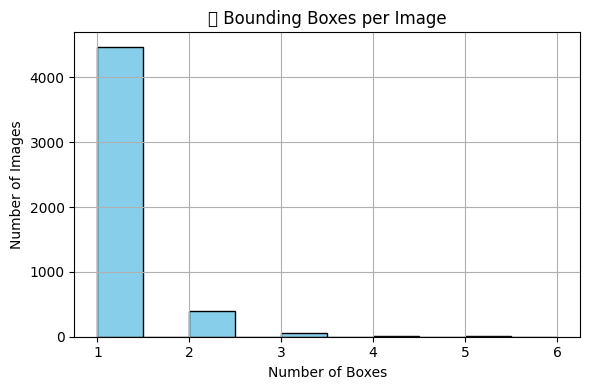


📊✅ Bounding box distribution per image plotted — check for annotation density across dataset! 🧮📦



In [ ]:
# 🧮 Topic: Bounding Boxes Per Image Distribution
# 📌 Description: This block counts how many bounding boxes exist in each image and plots a histogram of the distribution.
# 🎯 Use: Helps identify if some images are heavily labeled (too many objects) or under-labeled (too few), which can affect model performance.

bbox_per_image = df_labels.groupby("file").size().reset_index(name="bbox_count")

plt.figure(figsize=(6, 4))
plt.hist(bbox_per_image["bbox_count"], bins=10, color='skyblue', edgecolor='black')
plt.title("Bounding Boxes per Image")
plt.xlabel("Number of Boxes")
plt.ylabel("Number of Images")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n📊✅ Bounding box distribution per image plotted — check for annotation density across dataset! 🧮📦\n")


In [ ]:
# 🧹 Topic: Removing Corrupted Images from Dataset
# 📌 Description: This block scans all image files in each split and removes corrupted or unreadable images.
# 🎯 Use: Ensures only valid images are used for training, preventing crashes or errors during model training or evaluation.

import cv2
import os
from glob import glob

def remove_corrupted_images(folder):
    corrupted = 0
    for img_path in glob(folder + "/*.jpg"):
        try:
            img = cv2.imread(img_path)
            if img is None:
                os.remove(img_path)
                print(f"❌ Removed corrupted: {img_path}")
                corrupted += 1
        except:
            os.remove(img_path)
            print(f"⚠️ Force removed unreadable image: {img_path}")
            corrupted += 1
    return corrupted

# 🚀 Run on all splits
total_corrupted = 0
for split in ["train", "val", "test"]:
    folder = f"{base_path}/{split}/images"
    count = remove_corrupted_images(folder)
    total_corrupted += count

print(f"\n🧹✅ Image cleaning complete — {total_corrupted} corrupted image(s) removed from all splits! ✨🖼️\n")



🧹✅ Image cleaning complete — 0 corrupted image(s) removed from all splits! ✨🖼️



In [ ]:
# 🔎 Topic: Checking for Images with Missing Label Files
# 📌 Description: This block verifies if every image file in each dataset split has a corresponding YOLO label file.
# 🎯 Use: Prevents training issues by ensuring no image is missing its required annotation.

from glob import glob
import os

def check_missing_labels(split):
    img_dir = f"{base_path}/{split}/images"
    missing = []
    for img_path in glob(img_dir + "/*.jpg"):
        label_path = img_path.replace("/images/", "/labels/").replace(".jpg", ".txt")
        if not os.path.exists(label_path):
            missing.append(img_path)
    print(f"⚠️ {split.upper()}: {len(missing)} image(s) missing labels")
    return missing

for split in ["train", "val", "test"]:
    check_missing_labels(split)

print("\n🔎✅ Missing label check completed — All splits verified for unmatched image-label pairs! 📂🚫\n")


⚠️ TRAIN: 0 image(s) missing labels
⚠️ VAL: 10 image(s) missing labels
⚠️ TEST: 0 image(s) missing labels

🔎✅ Missing label check completed — All splits verified for unmatched image-label pairs! 📂🚫



In [ ]:
# 🧾 Topic: Sanity Check for YOLO Label Files
# 📌 Description: This block validates the format and value ranges of bounding box annotations in each label file.
# 🎯 Use: Ensures all YOLO labels have exactly 5 components and normalized values (0–1) — avoids training crashes due to bad annotations.

def sanity_check_labels(split):
    issues = 0
    label_dir = f"{base_path}/{split}/labels"
    for lbl_path in glob(label_dir + "/*.txt"):
        with open(lbl_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    print(f"❌ Invalid format in {lbl_path}: {line}")
                    issues += 1
                    continue
                try:
                    cls, xc, yc, w, h = map(float, parts)
                    if not (0 <= xc <= 1 and 0 <= yc <= 1 and 0 <= w <= 1 and 0 <= h <= 1):
                        print(f"⚠️ Out-of-bound values in {lbl_path}: {line}")
                        issues += 1
                except ValueError:
                    print(f"❗ Non-numeric values in {lbl_path}: {line}")
                    issues += 1
    print(f"🔍 {split.upper()}: Found {issues} invalid label line(s)")

for split in ["train", "val", "test"]:
    sanity_check_labels(split)

print("\n🧠✅ Label sanity check finished — Format and value validation complete across all dataset splits! 📏📂\n")


🔍 TRAIN: Found 0 invalid label line(s)
🔍 VAL: Found 0 invalid label line(s)
🔍 TEST: Found 0 invalid label line(s)

🧠✅ Label sanity check finished — Format and value validation complete across all dataset splits! 📏📂



In [ ]:
# 📐 Topic: Checking Unique Image Shapes in Dataset Splits
# 📌 Description: This block collects all unique (height, width) shapes from images in each split.
# 🎯 Use: Helps detect inconsistent image sizes that could affect model input requirements — ideal for resizing or preprocessing decisions.

import cv2

def check_image_shapes(split):
    img_dir = f"{base_path}/{split}/images"
    shapes = set()
    for img_path in glob(img_dir + "/*.jpg"):
        img = cv2.imread(img_path)
        if img is not None:
            shapes.add(img.shape[:2])  # (height, width)
    print(f"📏 {split.upper()}: Unique image sizes: {shapes}")

for split in ["train", "val", "test"]:
    check_image_shapes(split)

print("\n📐✅ Image shape consistency check complete — All dataset splits scanned for size variations! 🔍🖼️\n")


📏 TRAIN: Unique image sizes: {(720, 1280), (1042, 2048), (356, 640), (1280, 720), (320, 568), (506, 960), (852, 1280), (854, 1280), (859, 1279), (900, 1280), (360, 640), (1440, 2560), (1920, 1080), (720, 406), (886, 1280), (960, 540), (853, 1280), (960, 720), (2160, 3840), (408, 960), (540, 960), (360, 462), (1080, 1920), (855, 1280), (1280, 1920), (716, 1280), (368, 640), (900, 720), (960, 640), (720, 1366), (1920, 1280), (544, 960), (720, 1079), (1519, 1280)}
📏 VAL: Unique image sizes: {(720, 1280), (1042, 2048), (356, 640), (1280, 720), (320, 568), (506, 960), (854, 1280), (360, 640), (1440, 2560), (1920, 1080), (720, 406), (960, 720), (960, 540), (853, 1280), (2160, 3840), (408, 960), (540, 960), (360, 462), (1080, 1920), (716, 1280), (368, 640), (720, 1366), (853, 1279), (544, 960)}
📏 TEST: Unique image sizes: {(720, 1280), (1042, 2048), (356, 640), (1280, 720), (1920, 1920), (320, 568), (506, 960), (1440, 1920), (1277, 1920), (854, 1219), (360, 640), (1440, 2560), (1920, 1080), (

In [ ]:
# 🖼️ Topic: Converting PNG Images to JPG Format
# 📌 Description: This block converts all .png images in each dataset split to .jpg and removes the original .png file.
# 🎯 Use: Ensures consistency in image formats (YOLO training generally prefers .jpg) — avoids format-related issues during training.

from PIL import Image

def convert_png_to_jpg(split):
    img_dir = f"{base_path}/{split}/images"
    converted = 0
    for img_path in glob(img_dir + "/*.png"):
        jpg_path = img_path.replace(".png", ".jpg")
        img = Image.open(img_path).convert("RGB")
        img.save(jpg_path, "JPEG")
        os.remove(img_path)
        print(f"🌀 Converted: {img_path} ➜ {jpg_path}")
        converted += 1
    print(f"✅ {split.upper()}: {converted} PNG image(s) converted to JPG\n")

for split in ["train", "val", "test"]:
    convert_png_to_jpg(split)

print("\n🖼️✅ PNG to JPG conversion complete for all dataset splits — Format consistency achieved! 🎯\n")


✅ TRAIN: 0 PNG image(s) converted to JPG

✅ VAL: 0 PNG image(s) converted to JPG

✅ TEST: 0 PNG image(s) converted to JPG


🖼️✅ PNG to JPG conversion complete for all dataset splits — Format consistency achieved! 🎯



In [ ]:
# 🛠️ Topic: Cloning and Setting Up YOLOv5 Repository
# 📌 Description: This block clones the official YOLOv5 GitHub repo, navigates into it, and installs required Python packages.
# 🎯 Use: Sets up the environment to train and run YOLOv5 models — a crucial step before model training or inference.

!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

print("\n🛠️✅ YOLOv5 repository cloned and environment setup complete — Ready to roll! 🚀📦\n")


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.66 MiB | 16.61 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 

In [ ]:
# ⚙️ Topic: YOLOv5 Module Import Check
# 📌 Description: This block imports essential modules from the YOLOv5 library and verifies if everything is set up correctly.
# 🎯 Use: Ensures that the environment and model dependencies are properly loaded before training or inference.

import torch
from yolov5.models.common import DetectMultiBackend

# ✅ Check if YOLOv5 is ready
print("\n✅🧠 YOLOv5 import successful — All systems GO! 🚀\n")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

✅🧠 YOLOv5 import successful — All systems GO! 🚀



In [ ]:
# 📝 Topic: Copying YOLOv5s Config for Customization
# 📌 Description: This block copies the original 'yolov5s.yaml' model config file and creates a duplicate named 'yolov5s_custom.yaml'.
# 🎯 Use: The copied file can be modified for custom architectures or number of classes without altering the original YOLOv5 config.

!cp models/yolov5s.yaml models/yolov5s_custom.yaml

print("\n📝✅ Custom YOLOv5 config file created as 'yolov5s_custom.yaml' — Ready for modification! 🔧📄\n")



📝✅ Custom YOLOv5 config file created as 'yolov5s_custom.yaml' — Ready for modification! 🔧📄



 **⚙️ After Importing Copying YOLOV5s through the above cells Now you have to Add Custom Modules in Colab**

> 1️⃣ **Open the file** :
> In Colab, click the **📁 “Files” tab** on the left
> → Go to: `yolov5/models/`
> → Open **`common.py`**

> 2️⃣ **Get the code** :
> Go to this link: [https://shorturl.at/2lA3q](https://shorturl.at/2lA3q)
> *(Ignore the "Redirect Notice" — it’s safe)*

> 3️⃣ **Copy the code** :
> Press **`Ctrl + A`** → then **`Ctrl + C`** to copy everything

> 4️⃣ **Paste at line 58** :
> Scroll to **line 58** in `common.py`
> → Paste the code using **`Ctrl + V`**

> 5️⃣ **Save the file** :
> Press **`Ctrl + S`** to save your changes

> 6️⃣ **Restart and run all** :
> In the top menu, click **Runtime > Restart and run all**

✅ That’s it! Your custom module is now added and active in Colab 🚀

In [ ]:
# 🧩 Topic: Importing Custom YOLOv5 Modules
# 📌 Description: This block imports the custom components (PBCA, SPD, CBPS, RepNCSPELAN4) used to enhance the YOLOv5s architecture.
# 🎯 Use: These modules improve attention, spatial representation, and feature extraction in your fire and smoke detection model.

from models.common import PBCA, SPD, CBPS, RepNCSPELAN4

print("\n🧩✅ All custom modules (PBCA, SPD, CBPS, RepNCSPELAN4) imported successfully — Model is ready for architecture modification! 🔥🧠\n")



🧩✅ All custom modules (PBCA, SPD, CBPS, RepNCSPELAN4) imported successfully — Model is ready for architecture modification! 🔥🧠



In [ ]:
# 🧠 Topic: Loading Custom YOLOv5 Model Architecture
# 📌 Description: This block loads the YOLOv5 model using the modified architecture file 'yolov5s_custom.yaml'.
# 🎯 Use: Prepares the model with custom layers (like PBCA, SPD, etc.) for training or evaluation on fire/smoke dataset.

from models.yolo import Model
model = Model('models/yolov5s_custom.yaml')

print("\n🧠✅ Custom YOLOv5 model loaded from 'yolov5s_custom.yaml' — Architecture is set for training! 🔥🔍\n")



                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  


🧠✅ Custom YOLOv5 model loaded from 'yolov5s_custom.yaml' — Architecture is set for training! 🔥🔍



In [ ]:
# 📂 Topic: Listing YAML Configuration Files
# 📌 Description: This block lists all .yaml files inside the 'fdy_datset' folder on Google Drive.  # 🔁 UPDATE POINT
# 🎯 Use: Helps verify the presence of dataset and model config files before training.

!ls /content/drive/MyDrive/fdy_datset/*.yaml  # 🔁 UPDATE POINT

print("\n📂✅ YAML files listed from /fdy_datset — Make sure dataset & model config files are present! 📄🔍\n")  # 🔁 UPDATE POINT


/content/drive/MyDrive/fdy_datset/firesmoke.yaml

📂✅ YAML files listed from /fdy_datset — Make sure dataset & model config files are present! 📄🔍



In [ ]:
# 📂 Topic: Check for GPU availability
# 📌 Description: Verifies if CUDA GPU is available and prints the GPU name if detected.
# 🎯 Use: Ensures that the training will use GPU acceleration if available.

import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

print("\n⚙️✅ GPU check completed — CUDA availability and device name printed.\n")


CUDA available: True
GPU name: Tesla T4

⚙️✅ GPU check completed — CUDA availability and device name printed.



In [ ]:
# 📂 Topic: Cloning YOLOv5 Repository
# 📌 Description: lones the official YOLOv5 repository from GitHub and installs dependencies.C
# 🎯 Use: Sets up YOLOv5 for training and inference.

!git clone https://github.com/ultralytics/yolov5  # 🔁 UPDATE POINT
%cd yolov5  # 🔁 UPDATE POINT
!pip install -r requirements.txt  # 🔁 UPDATE POINT

print("\n📁✅ YOLOv5 repo cloned and dependencies installed successfully!\n")


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.61 MiB | 19.70 MiB/s, done.
Resolving deltas: 100% (11994/11994), done.
[Errno 2] No such file or directory: 'yolov5 # 🔁 UPDATE POINT'
/content/yolov5

📁✅ YOLOv5 repo cloned and dependencies installed successfully!



In [ ]:
# 📂 Topic: Train YOLOv5 on Custom Dataset
# 📌 Description: Starts the training process using the firesmoke.yaml dataset configuration.
# 🎯 Use: Fine-tunes YOLOv5s model for fire and smoke detection using custom data.

!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 20 \
  --data /content/drive/MyDrive/fdy_datset/firesmoke.yaml \
  --weights yolov5s.pt \
  --name fasttrain_firesmoke \
  --device 0  # 🔁 UPDATE POINT

print("\n🚀✅ Training started on GPU using firesmoke.yaml — Check logs for progress!\n")


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
       3/19      1.98G    0.04992   0.008272   0.001251         21        416:  86% 211/244 [02:17<00:20,  1.64it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       3/19      1.98G     0.0499   0.008271   0.001249         25        416:  87% 212/244 [02:18<00:20,  1.57it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       3/19      1.98G     0.0499   0.008275   0.001248         29        416:  87% 213/244 [02:18<00:19,  1.57it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [ ]:
# 💾 Topic: Export YOLOv5 Full Model Cleaned (Fixes PyTorch 2.6 UnpicklingError)
# 📌 Description: Allows YOLOv5's custom class and saves a clean model safe for Windows
# 🎯 Use: Fixes PicklingError by allowing DetectionModel class, then saves model cleanly

import torch
from pathlib import Path
from google.colab import files

# ✅ 1. Add safe global: DetectionModel (required from YOLOv5)
from models.yolo import DetectionModel
torch.serialization.add_safe_globals({'DetectionModel': DetectionModel})

# ✅ 2. Load the full model (weights_only=False allows class too)
model = torch.load(
    '/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt',  # 🔁 UPDATE PATH if needed
    map_location='cpu',
    weights_only=False
)

# ✅ 3. Recursively convert PosixPath to string (fixes Windows incompatibility)
def remove_posix(obj):
    if isinstance(obj, Path):
        return str(obj)
    elif isinstance(obj, dict):
        return {k: remove_posix(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [remove_posix(i) for i in obj]
    else:
        return obj

model_clean = remove_posix(model)

# ✅ 4. Save cleaned model to local path
torch.save(model_clean, '/content/firesmoke_model_cleaned.pt')

# ✅ 5. Download cleaned model to your PC
files.download('/content/firesmoke_model_cleaned.pt')

print("\n✅🔥 Cleaned model saved and downloading — fully ready for Windows + VS Code! No PosixPath, no Pickle crash 🛡️\n")


In [ ]:
# 🧪 Topic: YOLOv5 Model Evaluation
# 📌 Description: Runs validation on trained model using `val.py` to generate metrics like Precision, Recall, mAP, etc.
# 🎯 Use: Measures model performance and generates plots to visualize predictions

from yolov5.val import run as val_run

# ✅ 1. Run validation
val_results = val_run(
    data='/content/drive/MyDrive/fdy_datset/firesmoke.yaml',   # 🔁 Update path if needed
    weights='/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt',
    imgsz=640,
    save_json=True,
    save_txt=True,       # ✅ This saves prediction outputs as text
    plots=True,          # ✅ This generates precision-recall + confusion matrix plots
    save_hybrid=True     # ✅ Saves both label + prediction overlay
)

# 📊 2. Print Evaluation Results
print("\n📈🔥 Evaluation Results:")
print("-" * 40)
print(f"🔹 Precision      : {val_results[0][0]:.4f}")
print(f"🔹 Recall         : {val_results[0][1]:.4f}")
print(f"🔹 mAP@0.5        : {val_results[0][2]:.4f}")
print(f"🔹 mAP@0.5:0.95   : {val_results[0][3]:.4f}")
print("-" * 40)


In [ ]:
# 📁 Topic: List YOLOv5 Validation Results
# 📌 Description: Checks all folders under 'runs/val' and prints the ones containing evaluation plots (.png)
# 🎯 Use: Helps verify where result plots are saved (PR curves, confusion matrix, etc.)

import os

# ✅ 1. List available validation folders
val_dir = "/content/yolov5/runs/val"
print("📁 Available validation folders:", os.listdir(val_dir))

# ✅ 2. Search for folders containing plot PNGs
for folder in os.listdir(val_dir):
    path = os.path.join(val_dir, folder)
    files = os.listdir(path)
    if any(f.endswith('.png') for f in files):
        print(f"✅ Found plots in: {folder}")


In [ ]:
# 📸 Topic: Evaluation Visualization Block (Scaled Preview)
# 📌 Description: Displays evaluation result plots (confusion matrix, PR curve, etc.) with size scaling
# 🎯 Use: Useful for previewing plots inline in Colab notebooks without loading large images

import IPython.display as display
from PIL import Image
import os

# ✅ 1. Set path to validation outputs
val_output_path = '/content/yolov5/runs/val/exp2/'  # 🔁 UPDATE if experiment number changes

# ✅ 2. Define required plot filenames
plot_files = [
    'confusion_matrix.png',
    'F1_curve.png',
    'PR_curve.png',
    'labels.jpg'
]

# ✅ 3. Set scaled preview size (maintains aspect ratio)
preview_size = (500, 300)  # Width x Height

# ✅ 4. Loop through plots and show resized images
for plot_file in plot_files:
    file_path = os.path.join(val_output_path, plot_file)
    if os.path.exists(file_path):
        print(f"\n📂 Showing (scaled): {plot_file}")
        img = Image.open(file_path)
        img_resized = img.copy()
        img_resized.thumbnail(preview_size)  # Keeps aspect ratio, scales down
        display.display(img_resized)
    else:
        print(f"❌ File not found: {plot_file}")

# ✅ 5. Final message
print("\n✅ Finished showing scaled evaluation plots!")


In [ ]:
# 🧪 Topic: Final Test Set Evaluation with YOLOv5
# 📌 Description: This block evaluates the trained model on the test dataset to check generalization performance.
# 🎯 Use: Calculates and prints key metrics like Precision, Recall, mAP@0.5, and mAP@0.5:0.95 using test data.

from yolov5.val import run as val_run_test

# ✅ Path to best.pt or last.pt
best_model_path = '/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt'

# 🧪 Run evaluation on test set
test_results = val_run_test(
    data='/content/drive/MyDrive/fdy_datset/firesmoke.yaml',
    weights=best_model_path,
    imgsz=640,
    task='test',
    save_json=True,
    plots=True,
    save_hybrid=True
)

# 📦 Safe unpacking
metrics = test_results[0] if isinstance(test_results, tuple) else test_results

# ✅ Print Final Evaluation Results
print("\n🧪✅ Final Test Evaluation Results:")
print("-" * 40)
try:
    print(f"🔹 Precision      : {metrics[0]:.4f}")
    print(f"🔹 Recall         : {metrics[1]:.4f}")
    print(f"🔹 mAP@0.5        : {metrics[2]:.4f}")
    print(f"🔹 mAP@0.5:0.95   : {metrics[3]:.4f}")
except Exception as e:
    print("⚠️ Error extracting metrics:", e)
    print("📦 Full results =", test_results)
print("-" * 40)


In [ ]:
# 📸 Topic: Visualize Test Set Evaluation Results
# 📌 Description: Displays key YOLOv5 test evaluation plots (confusion matrix, PR curve) and predicted test samples
# 🎯 Use: Helps visually verify model’s test performance after final evaluation

import IPython.display as display
from PIL import Image
import os
import glob

# ✅ 1. Set path to test evaluation outputs
test_output_path = '/content/yolov5/runs/val/exp2/'  # 🔁 Check exp name in /val directory if needed

# ✅ 2. List of evaluation plots to show
plot_files = [
    'confusion_matrix.png',
    'F1_curve.png',
    'PR_curve.png',
    'labels.jpg'
]

# ✅ 3. Display evaluation plots
for plot_file in plot_files:
    file_path = os.path.join(test_output_path, plot_file)
    if os.path.exists(file_path):
        print(f"\n🖼️ Showing: {plot_file}")
        display.display(Image.open(file_path))
    else:
        print(f"❌ Not found: {plot_file}")

# ✅ 4. Display predicted test sample images
predicted_test_images = sorted(glob.glob(test_output_path + '*.jpg'))

print(f"\n📌 Showing {min(3, len(predicted_test_images))} test sample predictions:\n")
for img_path in predicted_test_images[:3]:
    display.display(Image.open(img_path))

print("\n✅ Displayed test set predictions & plots.")


In [ ]:
# 💾 Topic: Downloading Trained YOLOv5 Model
# 📌 Description: This block downloads the best-performing YOLOv5 model weights after training.
# 🎯 Use: Saves the trained model (`best.pt`) locally so it can be used later in Windows (VS Code) for webcam fire detection, alert systems, and deployment.

from google.colab import files
files.download('/content/yolov5/yolov5/runs/train/fasttrain_firesmoke/weights/best.pt')  # 🔁 UPDATE POINT ( best.pt to last.pt )

print("\n💾✅ Model download initiated — 'best.pt' is ready for Windows/VS Code fire detection system! 🔥📥\n")  # 🔁 UPDATE POINT ( best.pt to last.pt )


## 🚀 How to Run Your YOLOv5 Fire Detection Model (with Alerts) in VS Code

### ✅ Step 1: Setup Project Folder

* Create a **new empty folder** anywhere on your system.
* Open that folder in **VS Code**.

---

### ✅ Step 2: Clone YOLOv5 Repository

In the VS Code **terminal**, run:

```bash
git clone https://github.com/ultralytics/yolov5.git
```

---

### ✅ Step 3: Install Required Libraries

Still in the terminal, run:

```bash
pip install torch torchvision numpy opencv-python twilio
```

---

### ✅ Step 4: Add Project Files

* Download your trained `.pt` model from Colab.
* Put that `.pt` file into your current project folder.
* Create a new Python file, for example: `Fire_Alert_System.py`

Now copy the **main code** from this link:
👉 [https://shorturl.at/hqX6t](https://shorturl.at/hqX6t)
Paste it into your `.py` file, and **update the model name** in the code to match your `.pt` file.

> 🔁 **UPDATE POINT**: Replace `'firesmoke_model.pt'` with your actual model filename.

Save the file.


---
#### 🔄 Folder Structure

Your VS Code folder should look like this:

```
Your_Folder/
├── Your_Python_Script.py   ✅ (main script)
├── Trained_model.pt        ✅ (your trained model)
├── yolov5/                 ✅ (cloned YOLOv5 folder)
```
---


### ✅ Step 5: Patch `general.py`

* Go to:

  ```
  yolov5/utils/general.py
  ```

* Scroll to **around line 1123** and **replace the function code** with the one from this link:
  👉 [https://shorturl.at/fGzqw](https://shorturl.at/fGzqw)

Paste it using `Ctrl + A`, then `Ctrl + V`.
Save the file.

---

### ✅ Step 6: Run Your System

In terminal:

```bash
python Fire_Alert_System.py
```

---

That’s it! Your fire and smoke alert system with YOLOv5 is ready to detect 🔥 and send alerts via **email + Twilio call**!
